In [1]:
import nltk 
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')
df_copy =df.copy()

# Data Cleaning

In [3]:
print(df.shape)

(568454, 10)


In [4]:
print(df.head(10))

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                  

In [5]:
print(df_copy.isna().sum())
df_cleaned = df_copy.dropna().reset_index(drop=True)
print(df_cleaned.shape)
print(df_cleaned)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64
(568401, 10)
            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568396  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568397  568451  B003S1WTCU  A3I8AFVPEE8KI5          

for col in df_cleaned.columns:
    dup_count = df_cleaned[col].nunique()
    if dup_count > 0:
        print(f"Column '{col}': {dup_count} duplicates")

In [6]:
text = print(df_cleaned['Text'])
print(df_cleaned.isna().sum())

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568396    Great for sesame chicken..this is a good if no...
568397    I'm disappointed with the flavor. The chocolat...
568398    These stars are small, so you can give 10-15 o...
568399    These are the BEST treats for training and rew...
568400    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568401, dtype: object
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
text = df_cleaned['Text']
text = text.str.lower()
tokenized_text = text.apply(word_tokenize)
df_cleaned['Text_token']=tokenized_text
# tokenized_text = [word_tokenize(review) for review in text]

# filtered_sent=[]


# for w in tokenized_text:
#     for i in tokenized_text.loc:
#         pass
#     if w not in stop_words:
#         filtered_sent.append(w)


In [8]:
print(df_cleaned['Text_token'])

0         [i, have, bought, several, of, the, vitality, ...
1         [product, arrived, labeled, as, jumbo, salted,...
2         [this, is, a, confection, that, has, been, aro...
3         [if, you, are, looking, for, the, secret, ingr...
4         [great, taffy, at, a, great, price, ., there, ...
                                ...                        
568396    [great, for, sesame, chicken, .., this, is, a,...
568397    [i, 'm, disappointed, with, the, flavor, ., th...
568398    [these, stars, are, small, ,, so, you, can, gi...
568399    [these, are, the, best, treats, for, training,...
568400    [i, am, very, satisfied, ,, product, is, as, a...
Name: Text_token, Length: 568401, dtype: object


In [9]:
# filtering= list(map(lambda x:x not in stop_words,i)for i in df_cleaned['Text_token'])
df_cleaned['filterd'] = df_cleaned['Text_token'].apply(lambda x:', '.join(word for word in x if word not in stop_words) )
print(df_cleaned['filterd'])

0         bought, several, vitality, canned, dog, food, ...
1         product, arrived, labeled, jumbo, salted, pean...
2         confection, around, centuries, ., light, ,, pi...
3         looking, secret, ingredient, robitussin, belie...
4         great, taffy, great, price, ., wide, assortmen...
                                ...                        
568396    great, sesame, chicken, .., good, better, rest...
568397    'm, disappointed, flavor, ., chocolate, notes,...
568398    stars, small, ,, give, 10-15, one, training, s...
568399    best, treats, training, rewarding, dog, good, ...
568400    satisfied, ,, product, advertised, ,, use, cer...
Name: filterd, Length: 568401, dtype: object


In [10]:
from nltk.stem import   PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize

## Stemming

In [11]:
ps = PorterStemmer()
df_cleaned['Stemmed']= df_cleaned['filterd'].apply(lambda x:''.join(ps.stem(word) for word in x ) )
print(df_cleaned['Stemmed'])

0         bought, several, vitality, canned, dog, food, ...
1         product, arrived, labeled, jumbo, salted, pean...
2         confection, around, centuries, ., light, ,, pi...
3         looking, secret, ingredient, robitussin, belie...
4         great, taffy, great, price, ., wide, assortmen...
                                ...                        
568396    great, sesame, chicken, .., good, better, rest...
568397    'm, disappointed, flavor, ., chocolate, notes,...
568398    stars, small, ,, give, 10-15, one, training, s...
568399    best, treats, training, rewarding, dog, good, ...
568400    satisfied, ,, product, advertised, ,, use, cer...
Name: Stemmed, Length: 568401, dtype: object


## lemmatization

In [12]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
df_cleaned['lematized']= df_cleaned['Stemmed'].apply(lambda x:''.join(lem.lemmatize(word,"v") for word in x ) )


In [13]:
print(df_cleaned['lematized'])

0         bought, several, vitality, canned, dog, food, ...
1         product, arrived, labeled, jumbo, salted, pean...
2         confection, around, centuries, ., light, ,, pi...
3         looking, secret, ingredient, robitussin, belie...
4         great, taffy, great, price, ., wide, assortmen...
                                ...                        
568396    great, sesame, chicken, .., good, better, rest...
568397    'm, disappointed, flavor, ., chocolate, notes,...
568398    stars, small, ,, give, 10-15, one, training, s...
568399    best, treats, training, rewarding, dog, good, ...
568400    satisfied, ,, product, advertised, ,, use, cer...
Name: lematized, Length: 568401, dtype: object


## Sent token

# Main Sematic Segmentation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def lable(x):
    if x > 3:
        return 1
    elif x < 3:
        return -1
    else:
        return 0
df_cleaned['lable'] = df_cleaned['Score'].apply(lambda x: lable(x))

x_train,x_test,y_train, y_test = train_test_split(df_cleaned['lematized'],df_cleaned['lable'],test_size = 0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Logistic Regression
clf = LogisticRegression(max_iter=5000,class_weight='balanced') # balanced to overcome the big bias on the data
clf.fit(x_train_vec, y_train)



LogisticRegression(class_weight='balanced', max_iter=5000)

In [22]:
y_pred = clf.predict(x_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.62      0.73      0.67     24366
           0       0.25      0.61      0.35     12835
           1       0.97      0.80      0.87    133320

    accuracy                           0.77    170521
   macro avg       0.61      0.71      0.63    170521
weighted avg       0.86      0.77      0.80    170521



In [16]:
print(df_cleaned[df_cleaned['lable']==0.sum())

SyntaxError: invalid decimal literal (3068978287.py, line 1)

# Visualization 

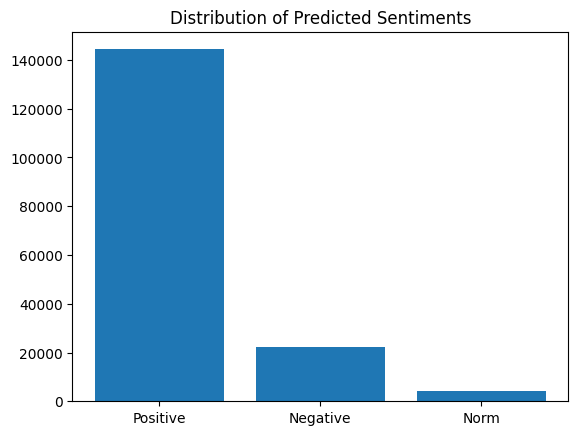

In [17]:
import matplotlib.pyplot as plt

plt.bar(['Positive', 'Negative', 'Norm'], [sum(y_pred==1), sum(y_pred==-1), sum(y_pred == 0)])
plt.title("Distribution of Predicted Sentiments")
plt.show()

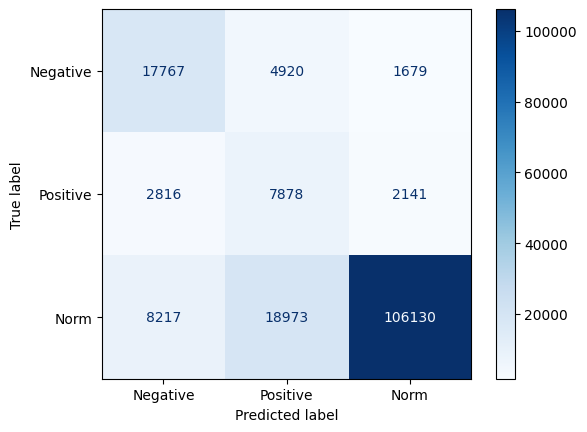

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive', 'Norm'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.73      0.67      0.70     24366
           0       0.52      0.16      0.25     12835
           1       0.89      0.97      0.93    133320

    accuracy                           0.86    170521
   macro avg       0.72      0.60      0.63    170521
weighted avg       0.84      0.86      0.85    170521



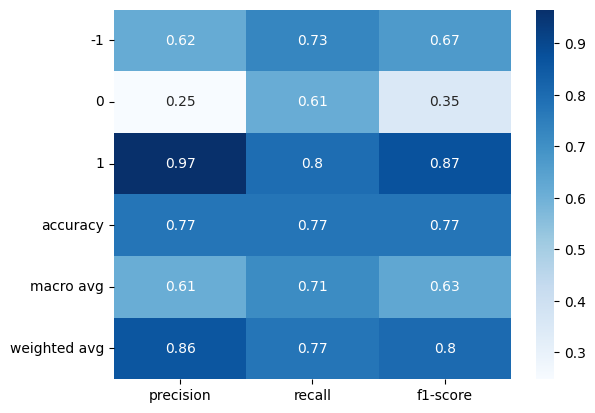

In [24]:
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.show()


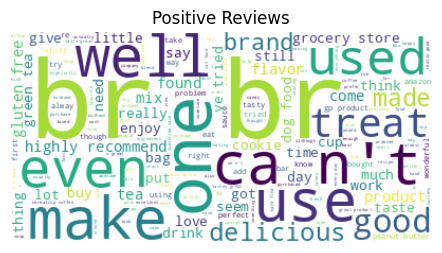

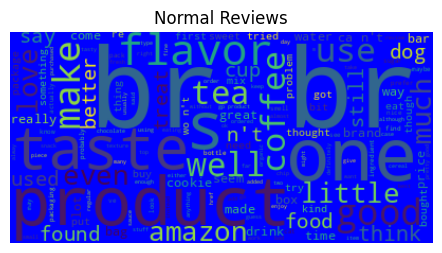

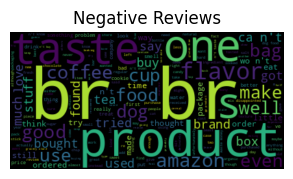

In [35]:
from wordcloud import WordCloud

positive_text = " ".join(x_test[y_pred==1])
negative_text = " ".join(x_test[y_pred==-1])
norm_text = " ".join(x_test[y_pred ==0])

wordcloud_pos = WordCloud(background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(background_color="black").generate(negative_text)
wordcloud_nor = WordCloud(background_color="blue").generate(norm_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.imshow(wordcloud_nor, interpolation='bilinear')
plt.axis("off")
plt.title("Normal Reviews")

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")
plt.show()
